In [2]:
import pandas as pd
import numpy as np

In [3]:
#Reading csvfile from location
df = pd.read_csv("datasets/minwage.csv")

In [4]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [6]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

In [7]:
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


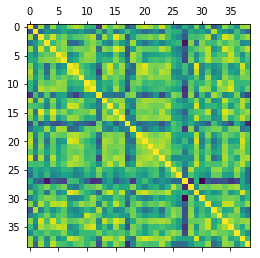

In [9]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

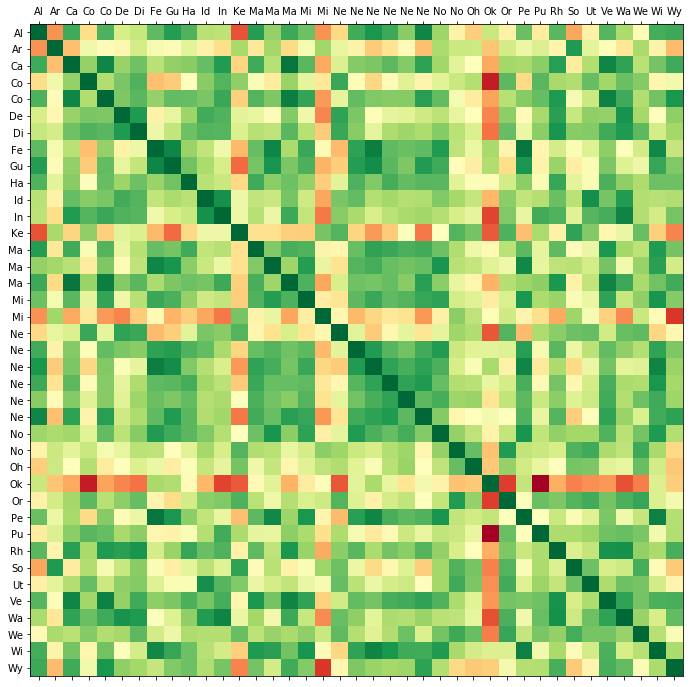

In [18]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

In [19]:
# We will rename states with same code
# pip install lxml html5lib bs4
# on mac, run: /Applications/Python\ 3.7/Install\ Certificates.command

In [25]:
import pandas as pd
import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)

# https://www.infoplease.com/state-abbreviations-and-state-postal-codes

dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

In [26]:
for df in dfs:
    print(df.head())  # one is states, the other territory

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [36]:
state_abbv = dfs[0]

state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [37]:
state_abbv.to_csv("datasets/state_abbv.csv", index=False) #Write (index=False)  # index in this case is worthless 

In [38]:
state_abbv = pd.read_csv("datasets/state_abbv.csv", index_col=0)
state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [39]:
abbv_dict = state_abbv.to_dict()
abbv_dict

{'Abbreviation': {'Alabama': 'Ala.',
  'Alaska': 'Alaska',
  'Arizona': 'Ariz.',
  'Arkansas': 'Ark.',
  'California': 'Calif.',
  'Colorado': 'Colo.',
  'Connecticut': 'Conn.',
  'Delaware': 'Del.',
  'District of Columbia': 'D.C.',
  'Florida': 'Fla.',
  'Georgia': 'Ga.',
  'Hawaii': 'Hawaii',
  'Idaho': 'Idaho',
  'Illinois': 'Ill.',
  'Indiana': 'Ind.',
  'Iowa': 'Iowa',
  'Kansas': 'Kans.',
  'Kentucky': 'Ky.',
  'Louisiana': 'La.',
  'Maine': 'Maine',
  'Maryland': 'Md.',
  'Massachusetts': 'Mass.',
  'Michigan': 'Mich.',
  'Minnesota': 'Minn.',
  'Mississippi': 'Miss.',
  'Missouri': 'Mo.',
  'Montana': 'Mont.',
  'Nebraska': 'Nebr.',
  'Nevada': 'Nev.',
  'New Hampshire': 'N.H.',
  'New Jersey': 'N.J.',
  'New Mexico': 'N.M.',
  'New York': 'N.Y.',
  'North Carolina': 'N.C.',
  'North Dakota': 'N.D.',
  'Ohio': 'Ohio',
  'Oklahoma': 'Okla.',
  'Oregon': 'Ore.',
  'Pennsylvania': 'Pa.',
  'Rhode Island': 'R.I.',
  'South Carolina': 'S.C.',
  'South Dakota': 'S.D.',
  'Tennessee'

In [40]:
#In above dictinary we get different formats, but we wan a readable format
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [42]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]  # get abbv state names.

KeyError: 'Federal (FLSA)'

In [43]:
abbv_dict['Federal (FLSA)'] = "FLSA"
labels = [abbv_dict[c] for c in min_wage_corr.columns]  # get abbv state names.

KeyError: 'Guam'

In [44]:
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
labels = [abbv_dict[c] for c in min_wage_corr.columns]  # get abbv state names.

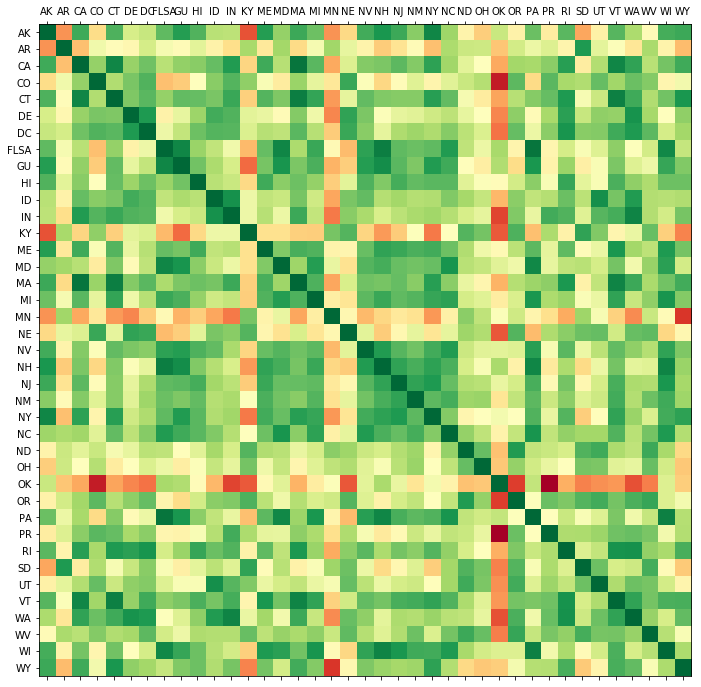

In [45]:
fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()